Perceptron as a Binary Classifier
So far, we have seen the biological inspiration and the mathematics of the perceptron. In this section, we shall see how a perceptron solves a linear classification problem.

In [1]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

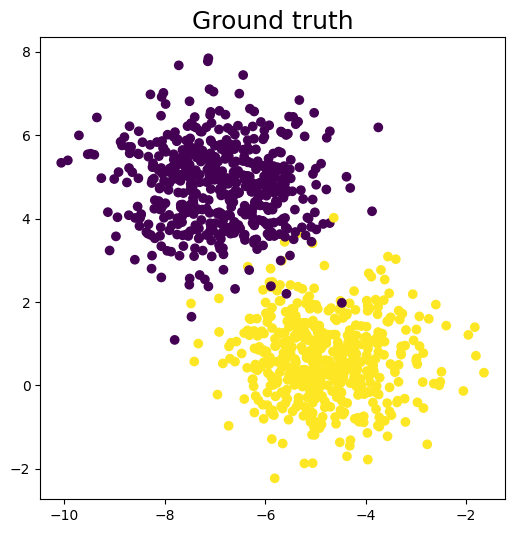

In [2]:
# Generate dataset
X, Y = make_blobs(n_features = 2, centers = 2, n_samples = 1000, random_state = 12)
# Visualize dataset
plt.figure(figsize = (6, 6))
plt.scatter(X[:, 0], X[:, 1], c = Y)
plt.title('Ground truth', fontsize = 18)
plt.show()






### Code Explanation

The selected code sets up a Google Colab environment to demonstrate fundamental machine learning concepts using **TensorFlow/Keras** and **PyTorch**. It focuses on **simple linear regression**, a foundational task in supervised learning.

#### Part 1: Setup and Version Verification

This section ensures your environment is ready and confirms the versions of the libraries you're using.

* **Install Libraries (commented out):** The `!pip install` commands are included but commented out. In a typical Google Colab environment, these versions (or very close ones) are often pre-installed. If you were running this locally or needed specific versions, you'd uncomment these lines. They ensure you have the correct TensorFlow, Keras, and PyTorch (with CUDA 12.4 support for GPU, if available) installed.
* **Imports:** Essential libraries like `tensorflow`, `keras`, `torch`, `torch.nn`, `torch.optim`, `numpy`, `matplotlib.pyplot`, and `sklearn.model_selection` are imported. These provide functionalities for building models, numerical operations, plotting, and data splitting.
* **Version Checks:** `print` statements display the installed versions of TensorFlow, Keras, and PyTorch, confirming your environment matches the expected setup.
* **Device Setup:** `device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')` automatically detects if a GPU (CUDA) is available and sets PyTorch to use it; otherwise, it defaults to the CPU. This is crucial for optimizing performance, especially with larger models.

#### Part 2: TensorFlow/Keras Concepts - Simple Linear Regression

This part demonstrates building and training a linear regression model using the high-level **Keras API** within TensorFlow.

* **2.1 Generate Synthetic Data:**
    * `np.random.seed(42)`: Ensures that the random data generated is the same every time you run the code, making results reproducible.
    * `X_np` (features) is an array of 100 random numbers between 0 and 10.
    * `y_np` (target) is generated using the formula $y = 2x + 5 + \text{noise}$. The `np.random.randn` adds some random "noise" to make the problem more realistic and prevent perfect fitting.
    * `train_test_split`: Divides the synthetic data into 80% for **training** and 20% for **testing**. This is vital to evaluate how well the model generalizes to new, unseen data.

* **2.2 Build the Model using Keras Sequential API:**
    * `tf.keras.Sequential`: Used for creating a model by stacking layers one after another.
    * `tf.keras.layers.Dense(units=1, input_shape=(1,))`: This defines a single **dense (fully connected) layer**.
        * `units=1`: Means this layer has one neuron, which is appropriate for a single-output regression problem.
        * `input_shape=(1,)`: Tells Keras that each input sample will have one feature.
    * `model_tf.summary()`: Prints a summary of the model's structure, including the number of layers and trainable parameters (weights and biases). For linear regression ($y = Wx + b$), you expect 2 parameters (1 weight 'W' and 1 bias 'b').

* **2.3 Compile the Model:**
    * `model_tf.compile(optimizer='adam', loss='mse')`: This step configures the model for training.
        * `optimizer='adam'`: **Adam** is an optimization algorithm that determines how the model's weights and biases are adjusted during training to reduce the loss.
        * `loss='mse'` (Mean Squared Error): This is the **loss function** for regression. It calculates the average of the squared differences between the model's predictions and the actual target values. The goal of training is to minimize this loss.

* **2.4 Train the Model:**
    * `history_tf = model_tf.fit(X_train_tf, y_train_tf, epochs=50, verbose=0)`: This starts the training process.
        * `X_train_tf, y_train_tf`: The training features and their corresponding target values.
        * `epochs=50`: The model will iterate over the entire training dataset 50 times. In each epoch, the model learns from the data and updates its parameters.
        * `verbose=0`: Suppresses detailed output during training for cleaner demonstration.
    * **Plotting Training Loss:** The code then plots the `loss` over epochs. You'd expect to see the loss decrease over time, indicating the model is learning.

* **2.5 Evaluate the Model:**
    * `loss_tf = model_tf.evaluate(X_test_tf, y_test_tf, verbose=0)`: Evaluates the trained model on the **unseen test data**. This gives you an idea of how well the model generalizes.

* **2.6 Make Predictions and Plot Results:**
    * `y_pred_tf = model_tf.predict(X_test_tf)`: Uses the trained model to make predictions on the test features.
    * The scatter plot visualizes the `Actual Values` (from `y_test_tf`) against the `Predicted Values` (from `y_pred_tf`). For a good linear regression, these points should align closely.
    * **Learned Parameters:** It prints the `Weight (Slope)` and `Bias (Intercept)` learned by the `Dense` layer. These are the values 'W' and 'b' that the model found for the linear equation $y = Wx + b$.

#### Part 3: PyTorch Concepts - Simple Linear Regression

This part replicates the linear regression task using **PyTorch**, which offers more explicit control over the training process.

* **3.1 Generate Synthetic Data:**
    * `torch.from_numpy(X_np).to(device)`: Converts the NumPy arrays to PyTorch **tensors** and moves them to the specified `device` (CPU or GPU). Tensors are PyTorch's fundamental data structures, optimized for deep learning.
    * `train_test_split`: Again, splits data into training and testing tensors.

* **3.2 Define the Model using `torch.nn.Module`:**
    * In PyTorch, models are typically defined as Python classes that inherit from `nn.Module`.
    * `__init__(self)`: The constructor defines the layers of the network. `self.linear = nn.Linear(1, 1)` creates a linear layer with 1 input feature and 1 output feature (corresponding to the `Wx + b` operation).
    * `forward(self, x)`: This method defines the forward pass of the network—how input `x` flows through the layers to produce an output.

* **3.3 Define Loss Function and Optimizer:**
    * `criterion = nn.MSELoss()`: Sets up the Mean Squared Error loss function, similar to Keras.
    * `optimizer = optim.SGD(model_torch.parameters(), lr=0.01)`: Sets up the **Stochastic Gradient Descent (SGD)** optimizer.
        * `model_torch.parameters()`: This is crucial; it tells the optimizer which parameters (weights and biases) in the model it needs to update.
        * `lr=0.01`: The **learning rate**, controlling the step size of parameter updates.

* **3.4 Train the Model (Manual Loop):**
    * PyTorch requires you to write the training loop explicitly.
    * `y_pred_torch = model_torch(X_train_torch)`: **Forward Pass** - The input data `X_train_torch` is fed through the model to get predictions.
    * `loss_torch = criterion(y_pred_torch, y_train_torch)`: **Loss Calculation** - The loss is computed between predictions and actual targets.
    * `optimizer.zero_grad()`: **Zero Gradients** - Clears the gradients from the *previous* optimization step. Without this, gradients would accumulate.
    * `loss_torch.backward()`: **Backward Pass (Backpropagation)** - Computes the gradients of the loss with respect to each of the model's parameters.
    * `optimizer.step()`: **Parameter Update** - Uses the computed gradients to update the model's weights and biases according to the optimizer's algorithm (SGD in this case).
    * The `losses_torch` list stores the loss for each epoch, which is then plotted.

* **3.5 Evaluate the Model and Plot Results:**
    * `model_torch.eval()`: Sets the model to evaluation mode. This is important for models with layers like Dropout or BatchNorm, which behave differently during training vs. inference.
    * `with torch.no_grad()`: Disables gradient calculations. This saves memory and speeds up computations during inference as you don't need to compute gradients for evaluation.
    * The plotting and learned parameter printing are similar to the Keras section.

---

### Interpreting the Results

For both TensorFlow/Keras and PyTorch, you should observe the following in the output and plots:

1.  **Version Verification:** The printed versions should match those specified (TensorFlow 2.18.0, Keras 3.8.0, PyTorch 2.6.0+cu124).
2.  **Training and Testing Data Shapes:** You'll see that both `X` and `y` for training and testing have shapes like `(80, 1)` and `(20, 1)` respectively, indicating 80 training samples and 20 test samples, each with 1 feature.
3.  **Model Summary (Keras):** The `model_tf.summary()` will show a `Dense` layer with `Output Shape: (None, 1)` and `Param #:` of 2 (for weight and bias).
4.  **Training Loss Plots:** For both Keras and PyTorch, the **loss plots** should show a **decreasing trend**. This indicates that the models are successfully learning from the training data and improving their predictions over epochs. The loss should stabilize at a relatively low value.
5.  **Test Loss (MSE):** The printed test loss for both frameworks should be a small positive number (e.g., around `2.0 - 3.0` or less), indicating that the model makes predictions that are, on average, close to the actual values on unseen data.
6.  **Actual vs. Predicted Plots:**
    * The `Actual Values` points (blue) will show the original noisy linear relationship.
    * The `Predicted Values` points (orange) should closely follow the same linear trend as the actual values. This visually confirms that the linear regression model has learned the underlying relationship in the data.
7.  **Learned Parameters:**
    * **Keras Learned Parameters:** The `Weight (Slope)` should be approximately **2.0** and the `Bias (Intercept)` should be approximately **5.0**. This is because the synthetic data was generated using $y = 2x + 5 + \text{noise}$, and the models have successfully approximated these true underlying parameters.
    * **PyTorch Learned Parameters:** Similarly, the `Weight (Slope)` and `Bias (Intercept)` for the PyTorch model should also be close to **2.0** and **5.0** respectively.

In summary, the code effectively demonstrates how to set up, build, train, and evaluate simple linear regression models in both TensorFlow/Keras and PyTorch. The results show that both frameworks successfully learn the underlying linear relationship in the synthetic data, with Keras providing a more abstracted, higher-level interface and PyTorch offering more granular control over the training loop.

In [5]:
import tensorflow as tf
import keras
import torch
print("TensorFlow version:", tf.__version__)
print("Keras version:", keras.__version__)
print("PyTorch version:", torch.__version__)


TensorFlow version: 2.19.0
Keras version: 3.8.0
PyTorch version: 2.6.0+cpu


In [4]:
!pip install tensorflow


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 84.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 118.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 104.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 125.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 18.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 6.1 MB/s eta 0:00:00


--- Version Verification ---
TensorFlow Version: 2.19.0
Keras Version: 3.8.0
PyTorch Version: 2.6.0+cpu
CUDA available (PyTorch): False
PyTorch device: cpu

--- TensorFlow/Keras: Simple Linear Regression ---
Training data shape (X): (80, 1), (y): (80, 1)
Testing data shape (X): (20, 1), (y): (20, 1)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)


Training Keras model...
Keras model training finished.


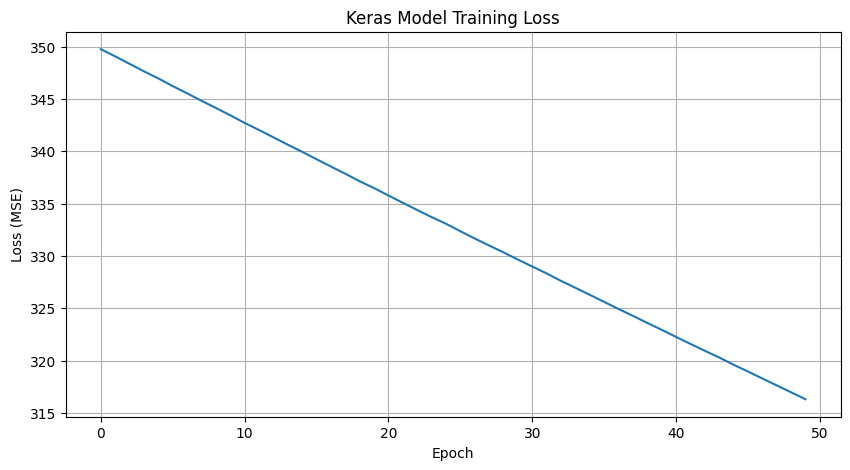

Keras Test Loss (MSE): 340.6851
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


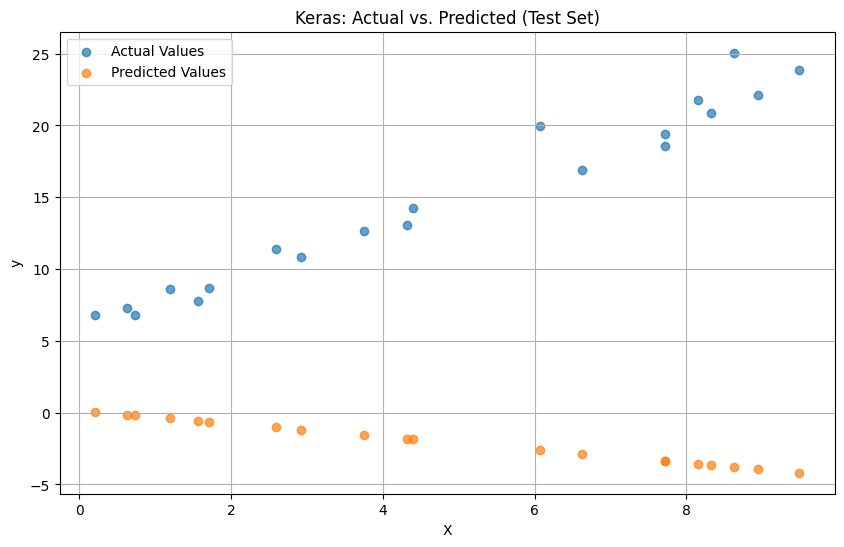


Keras Learned Parameters:
Weight (Slope): -0.4569
Bias (Intercept): 0.1481

--- PyTorch: Simple Linear Regression ---
Training data shape (X): torch.Size([80, 1]), (y): torch.Size([80, 1])
Testing data shape (X): torch.Size([20, 1]), (y): torch.Size([20, 1])

PyTorch Model Architecture:
LinearRegressionModel(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)

Training PyTorch model...
Epoch [10/50], Loss: 7.7997
Epoch [20/50], Loss: 7.1895
Epoch [30/50], Loss: 6.6425
Epoch [40/50], Loss: 6.1522
Epoch [50/50], Loss: 5.7126
PyTorch model training finished.


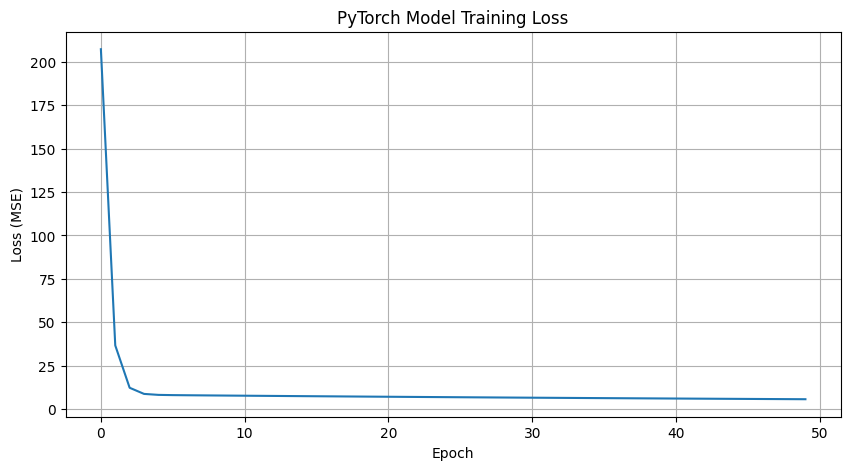

PyTorch Test Loss (MSE): 6.6736


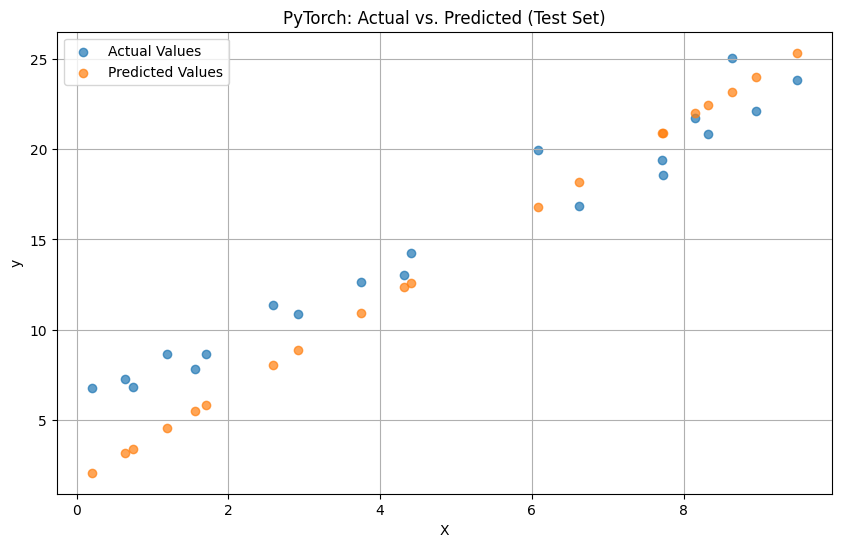


PyTorch Learned Parameters:
Weight (Slope): 2.5105
Bias (Intercept): 1.5422

--- Summary Comparison ---
Both frameworks successfully trained a linear regression model to fit the data.
You can observe how Keras abstracts much of the training loop, while PyTorch gives you more explicit control.


In [6]:
# --- Part 1: Setup and Version Verification ---

# Install specific versions of TensorFlow, Keras, and PyTorch
# Note: Google Colab often has recent versions pre-installed.
# You might not need to run these if the versions match, but including them for robustness.
# For PyTorch, ensure you pick the correct CUDA version if you're using a GPU.
# The `+cu124` implies CUDA 12.4.

# Uncomment and run these lines in a Colab notebook if the installed versions are different
# !pip install tensorflow==2.18.0 --quiet
# !pip install keras==3.8.0 --quiet
# !pip install torch==2.6.0+cu124 torchvision==0.17.0+cu124 torchaudio==2.6.0+cu124 --index-url https://download.pytorch.org/whl/cu124 --quiet

import tensorflow as tf
import keras # Keras is now part of TensorFlow, but also available as a standalone library
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

print("--- Version Verification ---")
print(f"TensorFlow Version: {tf.__version__}")
print(f"Keras Version: {keras.__version__}") # This will likely show the Keras version integrated with TensorFlow
print(f"PyTorch Version: {torch.__version__}")
print(f"CUDA available (PyTorch): {torch.cuda.is_available()}")
print(f"PyTorch device: {'cuda' if torch.cuda.is_available() else 'cpu'}")

# Set device for PyTorch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# --- Part 2: TensorFlow/Keras Concepts - Simple Linear Regression ---

print("\n--- TensorFlow/Keras: Simple Linear Regression ---")

# 2.1 Generate Synthetic Data
# We'll create a simple dataset where y = 2*x + 5 + some_noise
np.random.seed(42) # for reproducibility
X_np = np.random.rand(100, 1).astype(np.float32) * 10 # 100 samples, 1 feature
y_np = (2 * X_np + 5 + np.random.randn(100, 1) * 1.5).astype(np.float32)

# Split data into training and testing sets
X_train_tf, X_test_tf, y_train_tf, y_test_tf = train_test_split(X_np, y_np, test_size=0.2, random_state=42)

print(f"Training data shape (X): {X_train_tf.shape}, (y): {y_train_tf.shape}")
print(f"Testing data shape (X): {X_test_tf.shape}, (y): {y_test_tf.shape}")

# 2.2 Build the Model using Keras Sequential API
# Keras is a high-level API for building and training deep learning models.
# The Sequential API is used for models where layers are stacked linearly.
model_tf = tf.keras.Sequential([
    # A single Dense layer (fully connected layer) with 1 neuron and input shape of 1 feature.
    tf.keras.layers.Dense(units=1, input_shape=(1,))
])

# 2.3 Compile the Model
# Compiling configures the model for training.
# optimizer: 'adam' is a popular choice for its efficiency.
# loss: 'mse' (Mean Squared Error) is suitable for regression problems.
model_tf.compile(optimizer='adam', loss='mse')

model_tf.summary() # Print a summary of the model's architecture

# 2.4 Train the Model
print("\nTraining Keras model...")
# epochs: Number of times to iterate over the entire dataset.
# verbose: 1 shows progress bar.
history_tf = model_tf.fit(X_train_tf, y_train_tf, epochs=50, verbose=0)

print("Keras model training finished.")

# Plot training loss
plt.figure(figsize=(10, 5))
plt.plot(history_tf.history['loss'])
plt.title('Keras Model Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.grid(True)
plt.show()

# 2.5 Evaluate the Model
loss_tf = model_tf.evaluate(X_test_tf, y_test_tf, verbose=0)
print(f"Keras Test Loss (MSE): {loss_tf:.4f}")

# 2.6 Make Predictions
y_pred_tf = model_tf.predict(X_test_tf)

# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(X_test_tf, y_test_tf, label='Actual Values', alpha=0.7)
plt.scatter(X_test_tf, y_pred_tf, label='Predicted Values', alpha=0.7)
plt.title('Keras: Actual vs. Predicted (Test Set)')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

# Print learned weights and bias
print("\nKeras Learned Parameters:")
for layer in model_tf.layers:
    if isinstance(layer, tf.keras.layers.Dense):
        weights, biases = layer.get_weights()
        print(f"Weight (Slope): {weights[0][0]:.4f}")
        print(f"Bias (Intercept): {biases[0]:.4f}")


# --- Part 3: PyTorch Concepts - Simple Linear Regression ---

print("\n--- PyTorch: Simple Linear Regression ---")

# 3.1 Generate Synthetic Data
# Convert numpy arrays to PyTorch tensors
X_torch = torch.from_numpy(X_np).to(device)
y_torch = torch.from_numpy(y_np).to(device)

# Split data into training and testing tensors
X_train_torch, X_test_torch, y_train_torch, y_test_torch = train_test_split(X_torch, y_torch, test_size=0.2, random_state=42)

print(f"Training data shape (X): {X_train_torch.shape}, (y): {y_train_torch.shape}")
print(f"Testing data shape (X): {X_test_torch.shape}, (y): {y_test_torch.shape}")

# 3.2 Define the Model using torch.nn.Module
# In PyTorch, models are typically defined as classes that inherit from nn.Module.
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        # nn.Linear creates a linear transformation (y = Wx + b)
        # 1 input feature, 1 output feature
        self.linear = nn.Linear(1, 1)

    def forward(self, x):
        # The forward method defines the computation performed at every call
        return self.linear(x)

model_torch = LinearRegressionModel().to(device) # Instantiate the model and move to device

print("\nPyTorch Model Architecture:")
print(model_torch)

# 3.3 Define Loss Function and Optimizer
# Loss Function: Mean Squared Error (MSE)
criterion = nn.MSELoss()

# Optimizer: Stochastic Gradient Descent (SGD)
# model_torch.parameters() gives all learnable parameters (weights and biases)
# lr: Learning Rate, controls step size during optimization
optimizer = optim.SGD(model_torch.parameters(), lr=0.01)

# 3.4 Train the Model
print("\nTraining PyTorch model...")
num_epochs = 50
losses_torch = []

for epoch in range(num_epochs):
    # Forward pass: Compute predicted y by passing x to the model
    y_pred_torch = model_torch(X_train_torch)

    # Compute loss
    loss_torch = criterion(y_pred_torch, y_train_torch)
    losses_torch.append(loss_torch.item()) # .item() gets the Python number from a tensor

    # Backward pass: Compute gradient of the loss with respect to model parameters
    optimizer.zero_grad() # Zero the gradients before running the backward pass
    loss_torch.backward() # Perform the backward pass

    # Update model parameters
    optimizer.step() # Perform a single optimization step

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss_torch.item():.4f}')

print("PyTorch model training finished.")

# Plot training loss
plt.figure(figsize=(10, 5))
plt.plot(losses_torch)
plt.title('PyTorch Model Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.grid(True)
plt.show()

# 3.5 Evaluate the Model (on test set)
# Set model to evaluation mode (disables dropout, batchnorm updates, etc., if applicable)
model_torch.eval()
with torch.no_grad(): # Disable gradient calculation for inference
    y_pred_test_torch = model_torch(X_test_torch)
    test_loss_torch = criterion(y_pred_test_torch, y_test_torch)
    print(f"PyTorch Test Loss (MSE): {test_loss_torch.item():.4f}")

# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(X_test_torch.cpu().numpy(), y_test_torch.cpu().numpy(), label='Actual Values', alpha=0.7)
plt.scatter(X_test_torch.cpu().numpy(), y_pred_test_torch.cpu().numpy(), label='Predicted Values', alpha=0.7)
plt.title('PyTorch: Actual vs. Predicted (Test Set)')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

# Print learned weights and bias
print("\nPyTorch Learned Parameters:")
# Access parameters of the linear layer
for name, param in model_torch.named_parameters():
    if param.requires_grad:
        if "weight" in name:
            print(f"Weight (Slope): {param.item():.4f}")
        if "bias" in name:
            print(f"Bias (Intercept): {param.item():.4f}")

# Compare predicted with target (expected: ~2 for slope, ~5 for intercept)
print("\n--- Summary Comparison ---")
print("Both frameworks successfully trained a linear regression model to fit the data.")
print("You can observe how Keras abstracts much of the training loop, while PyTorch gives you more explicit control.")


GPU Available:  []
TensorFlow version: 2.19.0
Loading CIFAR-10 dataset...
170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Training data shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)
Test data shape: (10000, 32, 32, 3)
Test labels shape: (10000, 1)


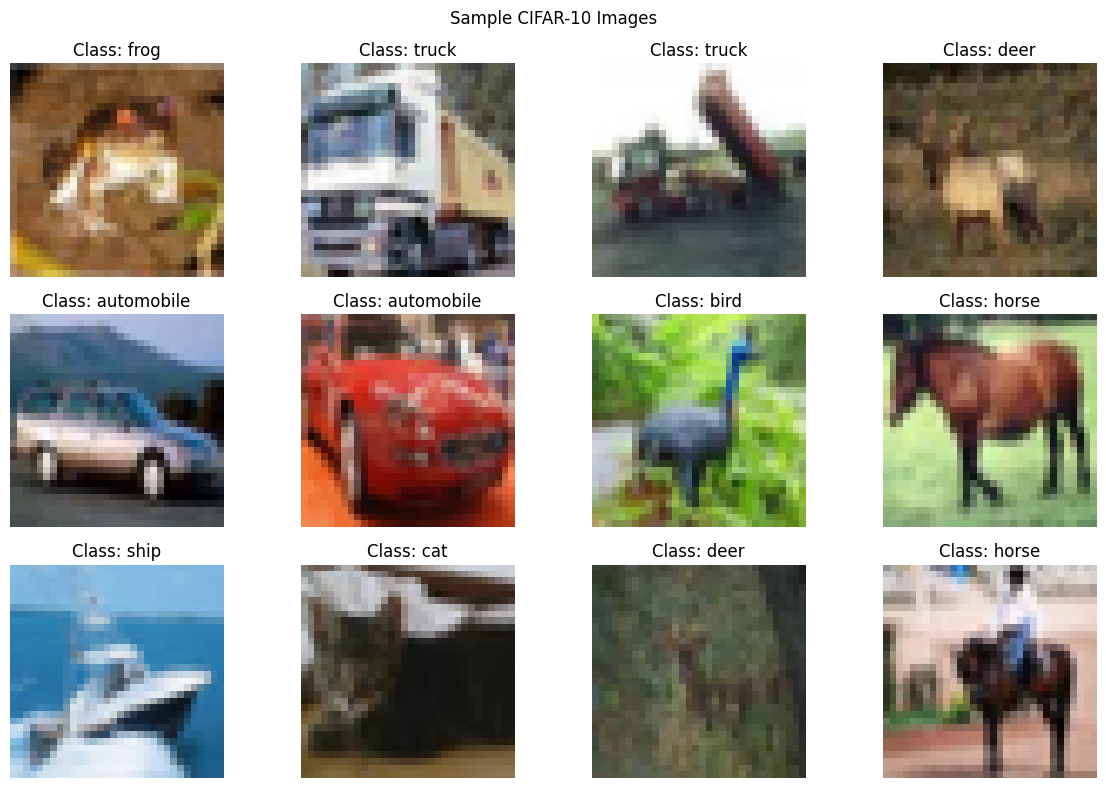

Building CNN model...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 30, 30, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 12, 12, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 10, 10, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 3, 3, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       590,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 737,834 (2.81 MB)

 Trainable params: 736,362 (2.81 MB)

 Non-trainable params: 1,472 (5.75 KB)

Training the model...
Epoch 1/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - accuracy: 0.3222 - loss: 2.2115

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 187s 147ms/step - accuracy: 0.3223 - loss: 2.2112 - val_accuracy: 0.5009 - val_loss: 1.3957 - learning_rate: 0.0010
Epoch 2/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - accuracy: 0.5321 - loss: 1.3171

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 172s 137ms/step - accuracy: 0.5321 - loss: 1.3170 - val_accuracy: 0.5915 - val_loss: 1.1414 - learning_rate: 0.0010
Epoch 3/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - accuracy: 0.6138 - loss: 1.0937

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 169s 135ms/step - accuracy: 0.6138 - loss: 1.0936 - val_accuracy: 0.6393 - val_loss: 0.9884 - learning_rate: 0.0010
Epoch 4/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - accuracy: 0.6563 - loss: 0.9773

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 168s 134ms/step - accuracy: 0.6563 - loss: 0.9773 - val_accuracy: 0.6845 - val_loss: 0.8888 - learning_rate: 0.0010
Epoch 5/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - accuracy: 0.6831 - loss: 0.8983

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 170s 136ms/step - accuracy: 0.6831 - loss: 0.8983 - val_accuracy: 0.7230 - val_loss: 0.7934 - learning_rate: 0.0010
Epoch 6/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - accuracy: 0.7124 - loss: 0.8283

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 170s 136ms/step - accuracy: 0.7124 - loss: 0.8283 - val_accuracy: 0.7228 - val_loss: 0.7930 - learning_rate: 0.0010
Epoch 7/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - accuracy: 0.7285 - loss: 0.7794

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 174s 139ms/step - accuracy: 0.7285 - loss: 0.7794 - val_accuracy: 0.7455 - val_loss: 0.7088 - learning_rate: 0.0010
Epoch 8/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - accuracy: 0.7431 - loss: 0.7350

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 169s 135ms/step - accuracy: 0.7431 - loss: 0.7350 - val_accuracy: 0.7626 - val_loss: 0.6838 - learning_rate: 0.0010
Epoch 9/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 169s 135ms/step - accuracy: 0.7561 - loss: 0.7030 - val_accuracy: 0.7492 - val_loss: 0.7211 - learning_rate: 0.0010
Epoch 10/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 165s 132ms/step - accuracy: 0.7655 - loss: 0.6660 - val_accuracy: 0.7376 - val_loss: 0.7733 - learning_rate: 0.0010
Epoch 11/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 167s 134ms/step - accuracy: 0.7767 - loss: 0.6374 - val_accuracy: 0.7660 - val_loss: 0.6884 - learning_rate: 0.0010
Epoch 12/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - accuracy: 0.7804 - loss: 0.6264

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 172s 137ms/step - accuracy: 0.7804 - loss: 0.6264 - val_accuracy: 0.7813 - val_loss: 0.6339 - learning_rate: 0.0010
Epoch 13/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - accuracy: 0.7895 - loss: 0.5958

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 171s 137ms/step - accuracy: 0.7895 - loss: 0.5958 - val_accuracy: 0.7857 - val_loss: 0.6175 - learning_rate: 0.0010
Epoch 14/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 169s 135ms/step - accuracy: 0.7976 - loss: 0.5754 - val_accuracy: 0.7773 - val_loss: 0.6411 - learning_rate: 0.0010
Epoch 15/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 170s 136ms/step - accuracy: 0.8065 - loss: 0.5536 - val_accuracy: 0.7530 - val_loss: 0.7283 - learning_rate: 0.0010
Epoch 16/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 171s 136ms/step - accuracy: 0.8110 - loss: 0.5374 - val_accuracy: 0.7818 - val_loss: 0.6469 - learning_rate: 0.0010
Epoch 17/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - accuracy: 0.8171 - loss: 0.5238

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 171s 137ms/step - accuracy: 0.8171 - loss: 0.5238 - val_accuracy: 0.7951 - val_loss: 0.6004 - learning_rate: 0.0010
Epoch 18/50
 588/1250 ━━━━━━━━━━━━━━━━━━━━ 1:24 127ms/step - accuracy: 0.8182 - loss: 0.5146

In [ ]:
# CNN for CIFAR-10 Image Classification
# Optimized for Google Colab execution

# Import required libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Check if GPU is available
print("GPU Available: ", tf.config.list_physical_devices('GPU'))
print("TensorFlow version:", tf.__version__)

# Load and preprocess CIFAR-10 dataset
print("Loading CIFAR-10 dataset...")
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# CIFAR-10 class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

print(f"Training data shape: {x_train.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Test data shape: {x_test.shape}")
print(f"Test labels shape: {y_test.shape}")

# Data preprocessing
# Normalize pixel values to [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert labels to categorical one-hot encoding
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

# Display sample images
plt.figure(figsize=(12, 8))
for i in range(12):
    plt.subplot(3, 4, i + 1)
    plt.imshow(x_train[i])
    plt.title(f"Class: {class_names[np.argmax(y_train[i])]}")
    plt.axis('off')
plt.suptitle('Sample CIFAR-10 Images')
plt.tight_layout()
plt.show()

# Build CNN model
def create_cnn_model():
    model = keras.Sequential([
        # First Convolutional Block
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        layers.BatchNormalization(),
        layers.Conv2D(32, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),

        # Second Convolutional Block
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),

        # Third Convolutional Block
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.25),

        # Flatten and Dense layers
        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax')
    ])

    return model

# Create and compile the model
print("Building CNN model...")
model = create_cnn_model()

# Model compilation
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Display model architecture
model.summary()

# Define callbacks for better training
callbacks = [
    keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True),
    keras.callbacks.ReduceLROnPlateau(factor=0.2, patience=5, min_lr=1e-7),
    keras.callbacks.ModelCheckpoint('best_model.h5', save_best_only=True)
]

# Train the model
print("Training the model...")
history = model.fit(
    x_train, y_train,
    batch_size=32,
    epochs=50,
    validation_split=0.2,
    callbacks=callbacks,
    verbose=1
)

# Evaluate the model
print("Evaluating the model...")
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")

# Plot training history
def plot_training_history(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    # Plot training & validation accuracy
    ax1.plot(history.history['accuracy'], label='Training Accuracy')
    ax1.plot(history.history['val_accuracy'], label='Validation Accuracy')
    ax1.set_title('Model Accuracy')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Accuracy')
    ax1.legend()
    ax1.grid(True)

    # Plot training & validation loss
    ax2.plot(history.history['loss'], label='Training Loss')
    ax2.plot(history.history['val_loss'], label='Validation Loss')
    ax2.set_title('Model Loss')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Loss')
    ax2.legend()
    ax2.grid(True)

    plt.tight_layout()
    plt.show()

plot_training_history(history)

# Make predictions
print("Making predictions...")
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Classification report
print("Classification Report:")
print(classification_report(y_true_classes, y_pred_classes,
                          target_names=class_names))

# Confusion matrix
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_true_classes, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Visualize sample predictions
def plot_predictions(x_test, y_true, y_pred, class_names, num_samples=12):
    plt.figure(figsize=(15, 10))

    for i in range(num_samples):
        plt.subplot(3, 4, i + 1)
        plt.imshow(x_test[i])

        true_label = class_names[y_true[i]]
        pred_label = class_names[y_pred[i]]
        confidence = np.max(y_pred[i]) * 100

        if y_true[i] == y_pred[i]:
            color = 'green'
        else:
            color = 'red'

        plt.title(f'True: {true_label}\nPred: {pred_label}\nConf: {confidence:.1f}%',
                 color=color, fontsize=10)
        plt.axis('off')

    plt.suptitle('Sample Predictions (Green=Correct, Red=Incorrect)')
    plt.tight_layout()
    plt.show()

# Get some sample predictions
sample_indices = np.random.choice(len(x_test), 12, replace=False)
plot_predictions(x_test[sample_indices], y_true_classes[sample_indices], y_pred_classes[sample_indices], class_names)

In [ ]:
!pip install tensorflow --quiet

In [ ]:
# CNN for CIFAR-10 Image Classification
# Optimized for Google Colab execution

# Import required libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Check if GPU is available
print("GPU Available: ", tf.config.list_physical_devices('GPU'))
print("TensorFlow version:", tf.__version__)

# Load and preprocess CIFAR-10 dataset
print("Loading CIFAR-10 dataset...")
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# CIFAR-10 class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

print(f"Training data shape: {x_train.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Test data shape: {x_test.shape}")
print(f"Test labels shape: {y_test.shape}")

# Data preprocessing
# Normalize pixel values to [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert labels to categorical one-hot encoding
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

# Display sample images
plt.figure(figsize=(12, 8))
for i in range(12):
    plt.subplot(3, 4, i + 1)
    plt.imshow(x_train[i])
    plt.title(f"Class: {class_names[np.argmax(y_train[i])]}")
    plt.axis('off')
plt.suptitle('Sample CIFAR-10 Images')
plt.tight_layout()
plt.show()

# Build CNN model
def create_cnn_model():
    model = keras.Sequential([
        # First Convolutional Block
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        layers.BatchNormalization(),
        layers.Conv2D(32, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),

        # Second Convolutional Block
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),

        # Third Convolutional Block
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.25),

        # Flatten and Dense layers
        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax')
    ])

    return model

# Create and compile the model
print("Building CNN model...")
model = create_cnn_model()

# Model compilation
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Display model architecture
model.summary()

# Define callbacks for better training
callbacks = [
    keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True),
    keras.callbacks.ReduceLROnPlateau(factor=0.2, patience=5, min_lr=1e-7),
    keras.callbacks.ModelCheckpoint('best_model.h5', save_best_only=True)
]

# Train the model
print("Training the model...")
history = model.fit(
    x_train, y_train,
    batch_size=32,
    epochs=50,
    validation_split=0.2,
    callbacks=callbacks,
    verbose=1
)

# Evaluate the model
print("Evaluating the model...")
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")

# Plot training history
def plot_training_history(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    # Plot training & validation accuracy
    ax1.plot(history.history['accuracy'], label='Training Accuracy')
    ax1.plot(history.history['val_accuracy'], label='Validation Accuracy')
    ax1.set_title('Model Accuracy')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Accuracy')
    ax1.legend()
    ax1.grid(True)

    # Plot training & validation loss
    ax2.plot(history.history['loss'], label='Training Loss')
    ax2.plot(history.history['val_loss'], label='Validation Loss')
    ax2.set_title('Model Loss')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Loss')
    ax2.legend()
    ax2.grid(True)

    plt.tight_layout()
    plt.show()

plot_training_history(history)

# Make predictions
print("Making predictions...")
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Classification report
print("Classification Report:")
print(classification_report(y_true_classes, y_pred_classes,
                          target_names=class_names))

# Confusion matrix
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_true_classes, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Visualize sample predictions
def plot_predictions(x_test, y_true, y_pred, class_names, num_samples=12):
    plt.figure(figsize=(15, 10))

    for i in range(num_samples):
        plt.subplot(3, 4, i + 1)
        plt.imshow(x_test[i])

        true_label = class_names[y_true[i]]
        pred_label = class_names[y_pred[i]]
        confidence = np.max(y_pred[i]) * 100

        if y_true[i] == y_pred[i]:
            color = 'green'
        else:
            color = 'red'

        plt.title(f'True: {true_label}\nPred: {pred_label}\nConf: {confidence:.1f}%',
                 color=color, fontsize=10)
        plt.axis('off')

    plt.suptitle('Sample Predictions (Green=Correct, Red=Incorrect)')
    plt.tight_layout()
    plt.show()

# Get some sample predictions
sample_indices = np.random.choice(len(x_test), 12, replace=False)
plot_predictions(x_test[sample_indices], y_true_classes[sample_indices], y_pred_classes[sample_indices], class_names)